In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('HousingData.csv')

In [3]:
X = data.iloc[:, :-1]  # All columns except the last one (MEDV)
y = data.iloc[:, -1]

In [4]:
correlations = X.corrwith(y)
best_feature = correlations.idxmax()

print(f"Best feature: {best_feature}")
print(f"Correlation with MEDV: {correlations.max()}")

Best feature: RM
Correlation with MEDV: 0.6953599470715396


In [5]:
X_best = X[[best_feature]].values

In [6]:
X_best_bias = np.c_[np.ones(X_best.shape[0]), X_best]

In [12]:
def analytic_solution(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [13]:
theta_analytic = analytic_solution(X_best_bias, y)
print(f"Analytic Solution Coefficients: {theta_analytic}")

Analytic Solution Coefficients: [-34.67062078   9.10210898]


In [8]:
def gradient_descent_full_batch(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    for i in range(iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta


In [9]:
def gradient_descent_stochastic(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    for i in range(iterations):
        for j in range(m):
            xi = X[j:j+1]
            yi = y[j:j+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

In [10]:
theta_full_batch = gradient_descent_full_batch(X_best_bias, y.values)
print(f"Full-batch Gradient Descent Coefficients: {theta_full_batch}")

# Compute the coefficients using Stochastic Gradient Descent
theta_stochastic = gradient_descent_stochastic(X_best_bias, y.values)
print(f"Stochastic Gradient Descent Coefficients: {theta_stochastic}")

Full-batch Gradient Descent Coefficients: [-6.97094389  4.74757935]
Stochastic Gradient Descent Coefficients: [-12.00729008   4.23046752]


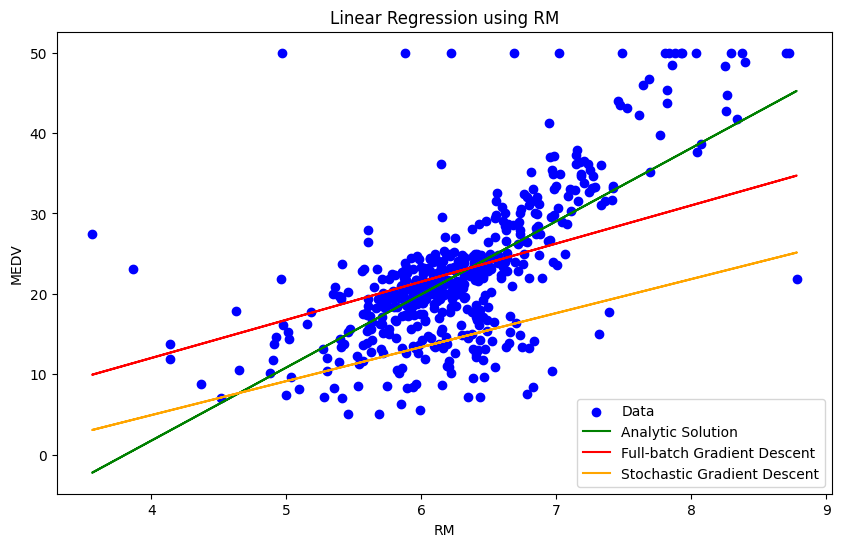

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_best, y, color='blue', label='Data')
plt.plot(X_best, X_best_bias.dot(theta_analytic), color='green', label='Analytic Solution')
plt.plot(X_best, X_best_bias.dot(theta_full_batch), color='red', label='Full-batch Gradient Descent')
plt.plot(X_best, X_best_bias.dot(theta_stochastic), color='orange', label='Stochastic Gradient Descent')
plt.xlabel(best_feature)
plt.ylabel('MEDV')
plt.legend()
plt.title(f'Linear Regression using {best_feature}')
plt.show()